In [46]:
import pandas as pd

In [47]:
df_clean = pd.read_csv("McDonald_s_Reviews.csv", encoding='latin-1')
df_clean = df_clean[["store_address", "latitude ", "longitude", "rating_count", "review_time", "review", "rating"]]

# Convert the rating column to a numeric one
df_clean.loc[:, "rating (stars)"] = df_clean["rating"].str.split(' ').map(lambda x: x[0] if len(x) > 0 else None)
df_clean = df_clean.drop(["rating"], axis=1)
df_clean["rating (stars)"] = df_clean["rating (stars)"].astype(int)

df_clean.head()

,store_address,latitude,longitude,rating_count,review_time,review,rating (stars)
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,3 months ago,Why does it look like someone spit on my food?...,1
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,Made a mobile order got to the speaker and che...,1
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,2 months ago,"I repeat my order 3 times in the drive thru, a...",1


In [48]:
df_clean.describe()

,latitude,longitude,rating_count,rating (stars)
count,32736.000000,32736.000000,33396.000000,33396.000000
mean,34.442546,-90.647033,2582.135286,3.131363
std,5.344116,16.594844,2507.312674,1.615139
min,25.790295,-121.995421,263.000000,1.000000
25%,28.655350,-97.792874,1406.000000,1.000000
50%,33.931261,-81.471414,1795.000000,3.000000
75%,40.727401,-75.399919,2810.000000,5.000000
max,44.981410,-73.459820,19682.000000,5.000000


In [49]:
# check how many restaurants there are
total_restaurants = len(df_clean["store_address"].unique().tolist())

print("Total number of restaurants is: ", total_restaurants)

Total number of restaurants is:  40


Let's break down the location of the stores and begin witht the city and state they are in.

In [50]:
# find all the US states and city which are listed
# we compare if len() if the list with address is at least 3 bc we want to extract the 3rd element (state is at index 2 if exists)
# same holds for the city (city is at index 2 of the list if it exists)
df_clean.loc[:, "state"] = df_clean["store_address"].str.split(", ").map(lambda x: x[2] if len(x) >= 3 else None)
# we need to remove the state code as well and leave only state
df_clean.loc[:, "state"] = df_clean["state"].str.split(" ").map(lambda x: x[0] if x else None)

df_clean.loc[:, "city"] = df_clean["store_address"].str.split(", "). map(lambda x: x[1] if len(x) >= 2 else None)
df_clean.head()

,store_address,latitude,longitude,rating_count,review_time,review,rating (stars),state,city
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,3 months ago,Why does it look like someone spit on my food?...,1,TX,Austin
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,It'd McDonalds. It is what it is as far as the...,4,TX,Austin
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,Made a mobile order got to the speaker and che...,1,TX,Austin
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,TX,Austin
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,2 months ago,"I repeat my order 3 times in the drive thru, a...",1,TX,Austin


Find the unique number of states and cities

In [51]:
# unique nr of states
nr_states = len(df_clean["state"].unique().tolist())
nr_cities = len(df_clean["city"].unique().tolist())

print("Total number of states is: ", nr_states)
print("Total number of cities is: ", nr_cities)

Total number of states is:  12
Total number of cities is:  27


Let's see the avg stars for each state/city

In [52]:
state_avg_stars = df_clean.groupby("state")["rating (stars)"].agg("mean").to_frame().reset_index()
state_avg_stars.sort_values(by="rating (stars)", ascending=False, inplace=True)
state_avg_stars

,state,rating (stars)
10,VA,3.697674
1,DC,3.594436
7,PA,3.463035
3,IL,3.362184
6,NY,3.299466
5,NJ,3.255710
0,CA,3.191455
8,TX,3.155415
4,Las,2.978641
2,FL,2.867514


In [53]:
# Create a pivot table to calculate average rating for each state and city
pivot_state_city= pd.pivot_table(df_clean, values=['rating (stars)', "rating_count"], index=['state', 'city'], aggfunc='mean')
pivot_state_city

rating (stars)  rating_count
state city                                               
CA    Los Angeles                  2.805609   2663.186654
      North Hollywood              3.377193   1794.561404
      San Diego                    3.166667    886.682927
      Santa Monica                 3.192683   3380.280488
      Sunnyvale                    3.330000   1562.000000
DC    Washington                   3.594436   1270.199122
FL    Fern Park                    3.470588   1617.670588
      Kissimmee                    2.810465   5566.552326
      Miami                        2.557962   2809.452229
      Miami Beach                  1.971930   4922.000000
      Orlando                      2.889968   6891.084142
IL    Oak Park                     3.362184   1454.000000
Las   3999 S Las Vegas Blvd        2.978641   2365.000000
NJ    Newark                       2.993023   1564.147287
      Voorhees Township            3.615058    933.000000
NY    Champlain                    3.269355   1306.016129
      New York                     3.309237   2449.547332
      Queens                       3.285965   2193.000000
PA    Brodheadsville               3.463035   1028.000000
TX    Austin                       2.910197   1329.059096
      Dallas                       3.143636   2657.690909
      Fort Worth                   3.270588    957.000000
      Roanoke                      3.465753    998.145548
      San Antonio                  3.127559   1460.000000
UT    Salt Lake City               2.525843   3243.000000
VA    Annandale                    3.697674    595.000000

In [54]:
pivot_state_city.reset_index(inplace=True)

In [55]:
# round the numbers
pivot_state_city["rating (stars)"] = pivot_state_city["rating (stars)"].round(1)
pivot_state_city["rating_count"] = pivot_state_city["rating_count"].round(0)

pivot_state_city.to_csv("pivoted_data.csv")

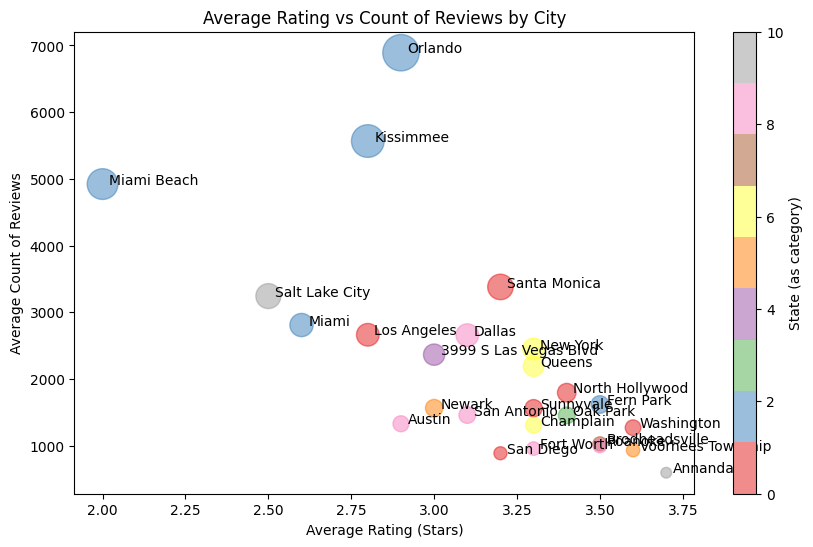

In [56]:
import matplotlib.pyplot as plt


# Create a bubble chart
plt.figure(figsize=(10, 6))

# Use a scatter plot where bubble size reflects rating_count
bubble_size = pivot_state_city['rating_count'] / 10  # Adjust the division factor to change bubble size

# Create the scatter plot
scatter = plt.scatter(pivot_state_city['rating (stars)'], pivot_state_city['rating_count'], s=bubble_size, 
                      alpha=0.5, c=pivot_state_city['state'].astype('category').cat.codes, cmap='Set1')

# Add labels
plt.xlabel('Average Rating (Stars)')
plt.ylabel('Average Count of Reviews')
plt.title('Average Rating vs Count of Reviews by City')

# Add state labels next to each point
for i in range(pivot_state_city.shape[0]):
    plt.text(pivot_state_city['rating (stars)'][i] + 0.02, pivot_state_city['rating_count'][i], pivot_state_city['city'][i])

# Display the chart
plt.colorbar(scatter, label='State (as category)')
plt.show()

The above plot is too nested thus, it'd be better to apply some kind of filtering to it (e.g. on state). So, in the "main.py" file we create an interactive dashboard which allows to filter for different states. We can see that in Miami the number of reveiws is high and the avg rating is low. Let's try to perform a sentiment analysis and see what's hapenning there.

In [57]:
import vaderSentiment 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

In [58]:
df_clean["review"].head(20)

0     Why does it look like someone spit on my food?...
1     It'd McDonalds. It is what it is as far as the...
2     Made a mobile order got to the speaker and che...
3     My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4     I repeat my order 3 times in the drive thru, a...
5     I work for door dash and they locked us all ou...
6     If I  could give this location a zero on custo...
7     Came in and ordered a Large coffee w/no ice. T...
8     Went thru drive thru. Ordered. Getting home no...
9     I'm not really a huge fan of fast food, but I ...
10    Worst McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...
11    We stopped by for a quick breakfast.  It was n...
12    The morning crew seems fast and efficient. Nig...
13    Today, i was disappointed in that restaurant #...
14    Ordered food burger wrong and left out part of...
15    This was a dine in experience. The tables were...
16    The line wS extremely big and was moving very ...
17    The boy who attended me made me wait and w

In [59]:
import re

# Function to remove non-ASCII characters
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Apply it to your reviews column
df_clean['cleaned_reviews'] = df_clean['review'].apply(remove_non_ascii)

df_clean['cleaned_reviews']

0        Why does it look like someone spit on my food?...
1        It'd McDonalds. It is what it is as far as the...
2        Made a mobile order got to the speaker and che...
3        My mc. Crispy chicken sandwich was  customer s...
4        I repeat my order 3 times in the drive thru, a...
                               ...                        
33391                          They treated me very badly.
33392                             The service is very good
33393                           To remove hunger is enough
33394    It's good, but lately it has become very expen...
33395                            they took good care of me
Name: cleaned_reviews, Length: 33396, dtype: object

In [60]:
def calculate_sentiment(text):
    sentimentAnalyser = SentimentIntensityAnalyzer()
    # Add custom negative terms or boost existing ones
    sentimentAnalyser.lexicon.update({
        'spit': -5,
        'milky white': -4,
        'd*** sure': -3
    })
    
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [61]:
# Apply the function to every row in the "text" column and output the results into a new column "sentiment_score"
df_clean['sentiment_score'] = df_clean['review'].apply(calculate_sentiment)

In [62]:
df_clean.head(10)

,store_address,latitude,longitude,rating_count,review_time,review,rating (stars),state,city,cleaned_reviews,sentiment_score
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,3 months ago,Why does it look like someone spit on my food?...,1,TX,Austin,Why does it look like someone spit on my food?...,-0.0343
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,It'd McDonalds. It is what it is as far as the...,4,TX,Austin,It'd McDonalds. It is what it is as far as the...,0.8687
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,Made a mobile order got to the speaker and che...,1,TX,Austin,Made a mobile order got to the speaker and che...,-0.2960
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,TX,Austin,My mc. Crispy chicken sandwich was customer s...,0.0000
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,2 months ago,"I repeat my order 3 times in the drive thru, a...",1,TX,Austin,"I repeat my order 3 times in the drive thru, a...",-0.8020
5,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,3 weeks ago,I work for door dash and they locked us all ou...,1,TX,Austin,I work for door dash and they locked us all ou...,-0.5267
6,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,3 months ago,If I could give this location a zero on custo...,1,TX,Austin,If I could give this location a zero on custo...,-0.7748
7,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,a year ago,Came in and ordered a Large coffee w/no ice. T...,1,TX,Austin,Came in and ordered a Large coffee w/no ice. T...,0.3818
8,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,3 months ago,Went thru drive thru. Ordered. Getting home no...,1,TX,Austin,Went thru drive thru. Ordered. Getting home no...,-0.6901
9,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,3 months ago,"I'm not really a huge fan of fast food, but I ...",4,TX,Austin,"I'm not really a huge fan of fast food, but I ...",0.9946


Let's focus on Miami Beach

In [63]:
miami_df = df_clean[df_clean["city"] == "Miami Beach"]
miami_df

,store_address,latitude,longitude,rating_count,review_time,review,rating (stars),state,city,cleaned_reviews,sentiment_score
10640,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,4922,3 months ago,Kids favorite restaurant and parentsï¿½ï¿½ï¿½ï...,3,FL,Miami Beach,Kids favorite restaurant and parents not so fa...,0.9463
10641,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,4922,a month ago,"Big Mac was cold. Tables, floor and whole rest...",1,FL,Miami Beach,"Big Mac was cold. Tables, floor and whole rest...",-0.5798
10642,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,4922,a month ago,One of two McDonald's stores in whole mid/sout...,2,FL,Miami Beach,One of two McDonald's stores in whole mid/sout...,0.4242
10643,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,4922,3 weeks ago,Very poor customer service on the part of the ...,5,FL,Miami Beach,Very poor customer service on the part of the ...,-0.4602
10644,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,4922,a month ago,This McDonald's is located on the corner of Wa...,4,FL,Miami Beach,This McDonald's is located on the corner of Wa...,0.1324
...,...,...,...,...,...,...,...,...,...,...,...
11205,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,4922,5 years ago,Very Bad service and NO CHESEEBURGER AT ALL!! ...,1,FL,Miami Beach,Very Bad service and NO CHESEEBURGER AT ALL!! ...,-0.9136
11206,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,4922,a year ago,Not open 24 hoursï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,1,FL,Miami Beach,Not open 24 hours,0.0000
11207,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,4922,5 years ago,They disregard promotion offers and very arrog...,1,FL,Miami Beach,They disregard promotion offers and very arrog...,-0.9019
11208,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,4922,3 years ago,Long waiting time for the order. Staff was nic...,4,FL,Miami Beach,Long waiting time for the order. Staff was nic...,0.4215


In [68]:
from sklearn.feature_extraction.text import CountVectorizer

negative_reviews = miami_df["cleaned_reviews"].tolist()
# Vectorize negative reviews
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(negative_reviews)

# Sum the word frequencies
word_freq = X.sum(axis=0)

# Get the most common words/phrases
common_words = [(word, word_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
common_words = sorted(common_words, key=lambda x: x[1], reverse=True)

print(common_words[:30])  # Top 10 complaints


[('food', np.int64(210)), ('order', np.int64(195)), ('service', np.int64(177)), ('mcdonald', np.int64(119)), ('place', np.int64(119)), ('staff', np.int64(104)), ('like', np.int64(94)), ('people', np.int64(89)), ('worst', np.int64(89)), ('rude', np.int64(75)), ('just', np.int64(72)), ('good', np.int64(72)), ('bad', np.int64(70)), ('mcdonalds', np.int64(68)), ('don', np.int64(67)), ('time', np.int64(62)), ('location', np.int64(59)), ('employees', np.int64(59)), ('dirty', np.int64(58)), ('minutes', np.int64(52)), ('customer', np.int64(52)), ('customers', np.int64(48)), ('ordered', np.int64(47)), ('got', np.int64(45)), ('manager', np.int64(45)), ('english', np.int64(44)), ('fries', np.int64(43)), ('asked', np.int64(40)), ('wrong', np.int64(39)), ('long', np.int64(39))]


In [67]:
from sklearn.decomposition import LatentDirichletAllocation

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)  # 5 topics
lda.fit(X)

# Display the topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])  # Top 10 words


Topic #1:
['bad', 'nuggets', 'staff', 'mcdonald', 'like', 'ordered', 'service', 'place', 'order', 'food']
Topic #2:
['location', 'just', 'staff', 'like', 'people', 'place', 'mcdonald', 'service', 'food', 'order']
Topic #3:
['english', 'didn', 'place', 'customer', 'don', 'rude', 'good', 'order', 'service', 'food']
Topic #4:
['good', 'cold', 'worst', 'asked', 'time', 'place', 'staff', 'service', 'food', 'order']
Topic #5:
['mcdonalds', 'people', 'don', 'staff', 'like', 'food', 'order', 'service', 'worst', 'mcdonald']
